In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
# Zahlendatensatz laden
digits = datasets.load_digits()

In [3]:
# Gefühl für Datensatz bekommen (optional, aber sehr empfohlen)
print("Dataset Shape:", digits.images.shape)
print("Labels:", digits.target_names)

Dataset Shape: (1797, 8, 8)
Labels: [0 1 2 3 4 5 6 7 8 9]


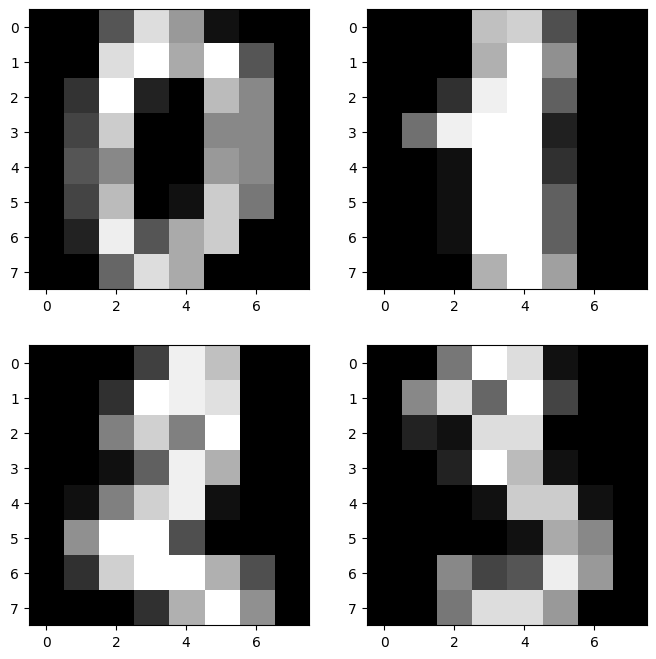

In [4]:
import matplotlib.pyplot as plt

# 2x2 Plot bauen
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten() # für bessere IUndizierung
axs[0].imshow(digits.images[0], cmap="gray")
axs[1].imshow(digits.images[1], cmap="gray")
axs[2].imshow(digits.images[2], cmap="gray")
axs[3].imshow(digits.images[3], cmap="gray")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [6]:
# pipeline für preprocessing und classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Daten skalieren für Mittelwert = 0 und Varianz = 1
    ('svm', SVC(gamma='auto'))  # Support Vector Machine classifier
])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(gamma='auto'))])

In [8]:
# Vorhersagen
predictions = pipeline.predict(X_test)

In [9]:
# Evaluierung
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



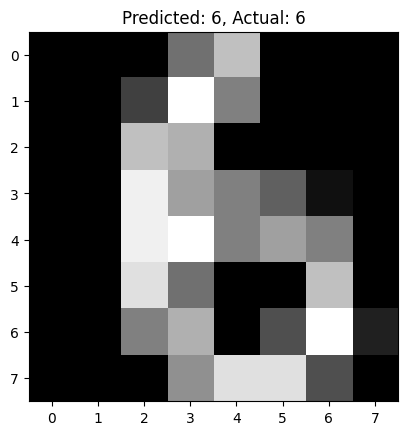

In [10]:
# Beispiel wie man die Vorhersagen nutzt, um einzelne Bilder vorherzusagen (optional) -> Inferenz (Einsatz in Prod-Betrieb)
import matplotlib.pyplot as plt
test_image = X_test[0].reshape(8, 8)
predicted_label = pipeline.predict([X_test[0]])[0]
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {y_test[0]}')
plt.show()